In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns 
import cosmicfish as cf 
import matplotlib.pyplot as plt
import dill
from scipy.integrate import quad

sns.set()

h = 0.7
rhocrit_ev = 1.0716790487886292 * (3.695e-11) # Units eV^4

basepath = '/Users/nicholasdeporzio/Desktop/cfworkspace/results/'
mattype = '/inv_fullfisher.mat'

masses_ev = np.append(np.array([0.001, 0.01]), np.geomspace(0.1, 22.0, 25))

high_desi_cmbs4_1507mK_covs = [pd.read_csv(basepath+'ps4/High_Masses/Fixed_Kmax/CMBS4/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_Terrs = [np.sqrt(high_desi_cmbs4_1507mK_covs[idx].iloc[6,6]) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegacdmerrs = [np.sqrt(high_desi_cmbs4_1507mK_covs[idx].iloc[1,1]) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegacovs = [pd.read_csv(basepath+'ps4/High_Masses/Fixed_Kmax/CMBS4/omega_version/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegaerrs = [np.sqrt(high_desi_cmbs4_1507mK_omegacovs[idx].iloc[6,6]) for idx in range(len(masses_ev))]

def integrand(p, m, T):
    integral = ((np.power(h, 2) / rhocrit_ev) * (2./np.power(2 * np.pi, 3)) * (1/ (np.exp(p/T) + 1)) * np.sqrt(np.power(p, 2) + np.power(m, 2))  * (4 * np.pi * np.power(p, 2)))
    return integral

omegashot = np.array([quad(integrand, 0, np.inf, args=(mval, 1.5*(0.862e-4)))[0] for mval in masses_ev])
omegascmbhot = np.array([quad(integrand, 0, np.inf, args=(mval, 1.5*(0.862e-4)*1100))[0] for mval in masses_ev])
omegacdm_set = 0.1127 - ((masses_ev/cf.NEUTRINO_SCALE_FACTOR) * np.power(1.5 / 1.95, 3.))                                     

dstepuphot = np.array([quad(integrand, 0, np.inf, args=(mval, 1.01*1.5*(0.862e-4)))[0] for mval in masses_ev])
dstepdownhot = np.array([quad(integrand, 0, np.inf, args=(mval, 0.99*1.5*(0.862e-4)))[0] for mval in masses_ev])
dstepupcmbhot = np.array([quad(integrand, 0, np.inf, args=(mval, 1.01*1.5*(0.862e-4)*1100 ))[0] for mval in masses_ev])
dstepdowncmbhot = np.array([quad(integrand, 0, np.inf, args=(mval, 0.99*1.5*(0.862e-4)*1100 ))[0] for mval in masses_ev])

domegadThot = (dstepuphot-dstepdownhot)/(2*0.01*1.5*(0.862e-4))
domegacmbdThot = (dstepupcmbhot-dstepdowncmbhot)/(2*0.01*1.5*(0.862e-4))

#Data
#data1 = (np.array(high_desi_cmbs4_1507mK_Terrs) * domegadThot) / omegashot
#data2 = (np.array(high_desi_cmbs4_1507mK_Terrs) * domegacmbdThot) / omegascmbhot
#data3 = np.array(high_desi_cmbs4_1507mK_omegacdmerrs) / omegacdm_set

data1 = omegashot/0.1127
data2 = omegascmbhot/0.1127
data3 = omegacdm_set/0.1127
data4 = (omegashot + omegacdm_set)/0.1127

plt.figure(figsize=(15,7.5))

plt.loglog(masses_ev, data1, label="CMBS4 + DESI, 1.5K, NCDM, z=0", linestyle='solid', color='red')
plt.loglog(masses_ev, data2, label="CMBS4 + DESI, 1.5K, NCDM, z=1100", linestyle='solid', color='green')
plt.loglog(masses_ev, data3, label="CMBS4 + DESI, 1.5K, CDM, z=0", linestyle='solid', color='blue')
plt.loglog(masses_ev, data4, label="CMBS4 + DESI, 1.5K, CDM+NCDM, z=0", linestyle='dashed', color='black')

text1 = r"-- $\omega_{ncdm}$ calculated by integrating $\omega(m, T)$."
text2 = r"-- $\omega_{cdm}$ calculated by 0.1127 - ($m_\chi$/93.14)*($T_\chi$/1.95)^3."
plt.text(1.0e-2, 1.0e-1, text1)
plt.text(1.0e-2, 1.0e-4, text2)

plt.xlabel(r"$M_\chi$ [eV]", fontsize=24)
plt.ylabel(r"$\omega/0.1127$", fontsize=24)
plt.legend(fontsize=18, loc='lower right')
plt.tick_params(axis='x', which='minttor')
plt.grid(True, which='minor')
plt.savefig("/Users/nicholasdeporzio/Desktop/testing/plot1.png")
plt.show()

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns 
import cosmicfish as cf 
import matplotlib.pyplot as plt
import dill
from scipy.integrate import quad

sns.set()

h = 0.7
rhocrit_ev = 1.0716790487886292 * 3.695e-11 # Units eV^4

basepath = '/Users/nicholasdeporzio/Desktop/cfworkspace/results/'
mattype = '/inv_fullfisher.mat'

masses_ev = np.append(np.array([0.001, 0.01]), np.geomspace(0.1, 22.0, 25))

high_desi_cmbs4_1507mK_covs = [pd.read_csv(basepath+'ps4/High_Masses/Fixed_Kmax/CMBS4/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_Terrs = [np.sqrt(high_desi_cmbs4_1507mK_covs[idx].iloc[6,6]) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegacdmerrs = [np.sqrt(high_desi_cmbs4_1507mK_covs[idx].iloc[1,1]) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegacovs = [pd.read_csv(basepath+'ps4/High_Masses/Fixed_Kmax/CMBS4/omega_version/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegaerrs = [np.sqrt(high_desi_cmbs4_1507mK_omegacovs[idx].iloc[6,6]) for idx in range(len(masses_ev))]

def integrand(p, m, T):
    integral = ((np.power(h, 2) / rhocrit_ev) * (2./np.power(2 * np.pi, 3)) * (1/ (np.exp(p/T) + 1)) * np.sqrt(np.power(p, 2) + np.power(m, 2))  * (4 * np.pi * np.power(p, 2)))
    return integral

omegashot = np.array([quad(integrand, 0, 1, args=(mval, 1.5*(0.862e-4)))[0] for mval in masses_ev])
omegascmbhot = np.array([quad(integrand, 0, 1, args=(mval, 1.5*(0.862e-4)*1100))[0] for mval in masses_ev])
omegacdm_set = 0.1127 - ((masses_ev/cf.NEUTRINO_SCALE_FACTOR) * np.power(1.5 / 1.95, 3.))                                     

dstepuphot = np.array([quad(integrand, 0, 1, args=(mval, 1.01*1.5*(0.862e-4)))[0] for mval in masses_ev])
dstepdownhot = np.array([quad(integrand, 0, 1, args=(mval, 0.99*1.5*(0.862e-4)))[0] for mval in masses_ev])
dstepupcmbhot = np.array([quad(integrand, 0, 1, args=(mval, 1.001*1.5*(0.862e-4)*1100 ))[0] for mval in masses_ev])
dstepdowncmbhot = np.array([quad(integrand, 0, 1, args=(mval, 0.999*1.5*(0.862e-4)*1100 ))[0] for mval in masses_ev])

domegadThot = (dstepuphot-dstepdownhot)/(2*0.01*1.5)
domegacmbdThot = (dstepupcmbhot-dstepdowncmbhot)/(2*0.001*1.5)

#Data
data1 = (np.array(high_desi_cmbs4_1507mK_Terrs) * domegadThot) 
data2 = (np.array(high_desi_cmbs4_1507mK_Terrs) * domegacmbdThot) 
data3 = np.array(high_desi_cmbs4_1507mK_omegacdmerrs) / omegacdm_set

plt.figure(figsize=(15,7.5))

plt.loglog(masses_ev, data1, label="CMBS4 + DESI, 1.5K, NCDM, z=0", linestyle='solid', color='red')
plt.loglog(masses_ev, data2, label="CMBS4 + DESI, 1.5K, NCDM, z=1100", linestyle='solid', color='green')
plt.loglog(masses_ev, data3, label="CMBS4 + DESI, 1.5K, CDM, z=0", linestyle='solid', color='blue')

plt.xlabel(r"$M_\chi$ [eV]", fontsize=24)
plt.ylabel(r"$\sigma_\omega$", fontsize=24)
plt.legend(fontsize=18, loc='lower right')
plt.tick_params(axis='x', which='minttor')
plt.grid(True, which='minor')
plt.savefig("/Users/nicholasdeporzio/Desktop/testing/plot2.png")
plt.show()

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns 
import cosmicfish as cf 
import matplotlib.pyplot as plt
import dill
from scipy.integrate import quad

sns.set()

h = 0.7
rhocrit_ev = 1.0716790487886292 * 3.695e-11 # Units eV^4

basepath = '/Users/nicholasdeporzio/Desktop/cfworkspace/results/'
mattype = '/inv_fullfisher.mat'

masses_ev = np.append(np.array([0.001, 0.01]), np.geomspace(0.1, 22.0, 25))

high_desi_cmbs4_905mK_covs = [pd.read_csv(basepath+'ps5/High_Masses/Fixed_Kmax/CMBS4/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_905mK_Terrs = [np.sqrt(high_desi_cmbs4_905mK_covs[idx].iloc[6,6]) for idx in range(len(masses_ev))]
high_desi_cmbs4_905mK_omegacdmerrs = [np.sqrt(high_desi_cmbs4_905mK_covs[idx].iloc[1,1]) for idx in range(len(masses_ev))]
high_desi_cmbs4_905mK_omegacovs = [pd.read_csv(basepath+'ps5/High_Masses/Fixed_Kmax/CMBS4/omega_version/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_905mK_omegaerrs = [np.sqrt(high_desi_cmbs4_905mK_omegacovs[idx].iloc[6,6]) for idx in range(len(masses_ev))]

def integrand(p, m, T):
    integral = ((np.power(h, 2) / rhocrit_ev) * (2./np.power(2 * np.pi, 3)) * (1/ (np.exp(p/T) + 1)) * np.sqrt(np.power(p, 2) + np.power(m, 2))  * (4 * np.pi * np.power(p, 2)))
    return integral

omegashot = np.array([quad(integrand, 0, 1, args=(mval, 0.9*(0.862e-4)))[0] for mval in masses_ev])
omegascmbhot = np.array([quad(integrand, 0, 1, args=(mval, 0.9*(0.862e-4)*1100))[0] for mval in masses_ev])
omegacdm_set = 0.1127 - ((masses_ev/cf.NEUTRINO_SCALE_FACTOR) * np.power(0.9 / 1.95, 3.))                                     

dstepuphot = np.array([quad(integrand, 0, 1, args=(mval, 1.01*0.9*(0.862e-4)))[0] for mval in masses_ev])
dstepdownhot = np.array([quad(integrand, 0, 1, args=(mval, 0.99*0.9*(0.862e-4)))[0] for mval in masses_ev])
dstepupcmbhot = np.array([quad(integrand, 0, 1, args=(mval, 1.001*0.9*(0.862e-4)*1100 ))[0] for mval in masses_ev])
dstepdowncmbhot = np.array([quad(integrand, 0, 1, args=(mval, 0.999*0.9*(0.862e-4)*1100 ))[0] for mval in masses_ev])

domegadThot = (dstepuphot-dstepdownhot)/(2*0.01*0.9)
domegacmbdThot = (dstepupcmbhot-dstepdowncmbhot)/(2*0.001*0.9) 

relerrNeff = 4. * np.array(high_desi_cmbs4_905mK_Terrs) / 0.9

#Data
data1 = (np.array(high_desi_cmbs4_905mK_Terrs) * domegadThot) / omegashot
data2 = (np.array(high_desi_cmbs4_905mK_Terrs) * domegacmbdThot) / omegascmbhot
#data3 =  np.array(high_desi_cmbs4_905mK_omegacdmerrs) / omegacdm_set
data4 = relerrNeff

plt.figure(figsize=(15,7.5))

plt.semilogx(masses_ev, data1, label=r"$\sigma_\omega/\omega$, CMBS4 + DESI, 0.9K, NCDM, z=0", linestyle='solid', color='red')
plt.semilogx(masses_ev, data2, label=r"$\sigma_\omega/\omega$, CMBS4 + DESI, 0.9K, NCDM, z=1100", linestyle='solid', color='green')
#plt.loglog(masses_ev, data3, label="CMBS4 + DESI, 0.9K, CDM, z=0", linestyle='solid', color='blue')
plt.semilogx(masses_ev, data4, label=r"$\sigma_{\Delta N_{eff}}/ \Delta N_{eff}$, CMBS4 + DESI, 0.9K, z=0", linestyle='solid', color='blue')

plt.title("T=0.9K", fontsize=24)
plt.xlabel(r"$M_\chi$ [eV]", fontsize=24)
plt.ylabel(r"1/Significance", fontsize=24)
plt.legend(fontsize=18, loc='lower right')
plt.tick_params(axis='x', which='minttor')
plt.grid(True, which='minor')
plt.savefig("/Users/nicholasdeporzio/Desktop/testing/plotA1.png")
plt.show()

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns 
import cosmicfish as cf 
import matplotlib.pyplot as plt
import dill
from scipy.integrate import quad

sns.set()

h = 0.7
rhocrit_ev = 1.0716790487886292 * 3.695e-11 # Units eV^4

basepath = '/Users/nicholasdeporzio/Desktop/cfworkspace/results/'
mattype = '/inv_fullfisher.mat'

masses_ev = np.append(np.array([0.001, 0.01]), np.geomspace(0.1, 22.0, 25))

high_desi_cmbs4_1507mK_covs = [pd.read_csv(basepath+'ps4/High_Masses/Fixed_Kmax/CMBS4/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_Terrs = [np.sqrt(high_desi_cmbs4_1507mK_covs[idx].iloc[6,6]) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegacdmerrs = [np.sqrt(high_desi_cmbs4_1507mK_covs[idx].iloc[1,1]) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegacovs = [pd.read_csv(basepath+'ps4/High_Masses/Fixed_Kmax/CMBS4/omega_version/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_1507mK_omegaerrs = [np.sqrt(high_desi_cmbs4_1507mK_omegacovs[idx].iloc[6,6]) for idx in range(len(masses_ev))]

def integrand(p, m, T):
    integral = ((np.power(h, 2) / rhocrit_ev) * (2./np.power(2 * np.pi, 3)) * (1/ (np.exp(p/T) + 1)) * np.sqrt(np.power(p, 2) + np.power(m, 2))  * (4 * np.pi * np.power(p, 2)))
    return integral

omegashot = np.array([quad(integrand, 0, 1, args=(mval, 1.5*(0.862e-4)))[0] for mval in masses_ev])
omegascmbhot = np.array([quad(integrand, 0, 1, args=(mval, 1.5*(0.862e-4)*1100))[0] for mval in masses_ev])
omegacdm_set = 0.1127 - ((masses_ev/cf.NEUTRINO_SCALE_FACTOR) * np.power(1.5 / 1.95, 3.))                                     

dstepuphot = np.array([quad(integrand, 0, 1, args=(mval, 1.01*1.5*(0.862e-4)))[0] for mval in masses_ev])
dstepdownhot = np.array([quad(integrand, 0, 1, args=(mval, 1.59*1.5*(0.862e-4)))[0] for mval in masses_ev])
dstepupcmbhot = np.array([quad(integrand, 0, 1, args=(mval, 1.001*1.5*(0.862e-4)*1100 ))[0] for mval in masses_ev])
dstepdowncmbhot = np.array([quad(integrand, 0, 1, args=(mval, 1.599*1.5*(0.862e-4)*1100 ))[0] for mval in masses_ev])

domegadThot = (dstepuphot-dstepdownhot)/(2*0.01*1.5)
domegacmbdThot = (dstepupcmbhot-dstepdowncmbhot)/(2*0.001*1.5) 

relerrNeff = 4. * np.array(high_desi_cmbs4_1507mK_Terrs) / 1.5

#Data
data1 = (np.array(high_desi_cmbs4_1507mK_Terrs) * domegadThot) / omegashot
data2 = (np.array(high_desi_cmbs4_1507mK_Terrs) * domegacmbdThot) / omegascmbhot
#data3 =  np.array(high_desi_cmbs4_1507mK_omegacdmerrs) / omegacdm_set
data4 = relerrNeff

print(domegadThot)
print(domegacmbdThot)

plt.figure(figsize=(15,7.5))

plt.semilogx(masses_ev, data1, label=r"$\sigma_\omega/\omega$, CMBS4 + DESI, 1.5K, NCDM, z=0", linestyle='solid', color='red')
plt.semilogx(masses_ev, data2, label=r"$\sigma_\omega/\omega$, CMBS4 + DESI, 1.5K, NCDM, z=1100", linestyle='solid', color='green')
#plt.loglog(masses_ev, data3, label="CMBS4 + DESI, 1.5K, CDM, z=0", linestyle='solid', color='blue')
plt.semilogx(masses_ev, data4, label=r"$\sigma_{\Delta N_{eff}}/ \Delta N_{eff}$, CMBS4 + DESI, 1.5K, z=0", linestyle='solid', color='blue')

plt.title("T=1.5K", fontsize=24)
plt.xlabel(r"$M_\chi$ [eV]", fontsize=24)
plt.ylabel(r"1/Significance", fontsize=24)
plt.legend(fontsize=18, loc='lower right')
plt.tick_params(axis='x', which='minttor')
plt.grid(True, which='minor')
plt.savefig("/Users/nicholasdeporzio/Desktop/testing/plotA2.png")
plt.show()

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns 
import cosmicfish as cf 
import matplotlib.pyplot as plt
import dill
from scipy.integrate import quad

sns.set()

h = 0.7
rhocrit_ev = 1.0716790487886292 * 3.695e-11 # Units eV^4

basepath = '/Users/nicholasdeporzio/Desktop/cfworkspace/results/'
mattype = '_Full_Fisher.dat'

masses_ev = np.append(np.array([0.001, 0.01]), np.geomspace(0.1, 22.0, 25))

fishers = [pd.read_csv(basepath+'ps12/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
reducedfishers = [np.delete(np.array(fisher), -5, axis=0) for fisher in fishers]
reducedfishers = [np.delete(fisher, -5, axis=1) for fisher in reducedfishers]
covariances = [np.linalg.inv(fisher) for fisher in reducedfishers]
DD = [np.sqrt(cov[-1, -1]) for cov in covariances]


#Data
data1 = DD


plt.figure(figsize=(15,7.5))

plt.semilogx(masses_ev, data1, label=r"D, CMBS4 + DESI, 0.9K", linestyle='solid', color='red')

plt.title("T=0.9K", fontsize=24)
plt.xlabel(r"$M_\chi$ [eV]", fontsize=24)
plt.ylabel(r"1/Significance", fontsize=24)
plt.legend(fontsize=18, loc='lower right')
plt.tick_params(axis='x', which='minttor')
plt.grid(True, which='minor')
plt.savefig("/Users/nicholasdeporzio/Desktop/testing/plotA3.png")
plt.show()

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns 
import cosmicfish as cf 
import matplotlib.pyplot as plt
from scipy.integrate import quad
import dill 

dill.load_session('/Users/nicholasdeporzio/Desktop/cfworkspace/results/PAPER_RESULTS/ps1/ps1.db')
noreliclogPg = np.log(neutrinoforecast.Pg)

dill.load_session('/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps5/High_Masses/Fixed_Kmax/ps5.db')
D = np.array([(np.log(fcst.Pg) - noreliclogPg) for fcst in ps5_forecastset])

F_dlogPgdomega_b = np.array([fval.dlogPgdomega_b  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdomega_cdm = np.array([fval.dlogPgdomega_cdm  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdn_s = np.array([fval.dlogPgdn_s  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdA_s = np.array([fval.dlogPgdA_s  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdtau_reio = np.array([fval.dlogPgdtau_reio  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdh = np.array([fval.dlogPgdh  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdT_ncdm = np.array([fval.dlogPgdT_ncdm  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdsigma_fog = np.array([fval.dlogPgdsigmafog  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdbeta0 = np.array([fval.dlogPgdb0  for fidx, fval in enumerate(ps5_forecastset)])
F_dlogPgdalphak2 = np.array([fval.dlogPgdalphak2  for fidx, fval in enumerate(ps5_forecastset)])
F_D = np.array([D[fidx]  for fidx, fval  in enumerate(ps5_forecastset)])

finalfishers = 27 * [0] 

mu_step=0.05

for fidx, fval in enumerate(ps5_forecastset): 

    paramvec =  [
        F_dlogPgdomega_b[fidx],
        F_dlogPgdomega_cdm[fidx],
        F_dlogPgdn_s[fidx],
        F_dlogPgdA_s[fidx],
        F_dlogPgdtau_reio[fidx],
        F_dlogPgdh[fidx],
        F_dlogPgdT_ncdm[fidx],
        F_dlogPgdsigma_fog[fidx],
        F_dlogPgdbeta0[fidx],
        F_dlogPgdalphak2[fidx],
        F_D[fidx]] 

    fisher = np.zeros((len(paramvec), len(paramvec)))                       
                                                                                
    # Highly inefficient set of loops                                       
    for pidx1, p1 in enumerate(paramvec):                                   
        for pidx2, p2 in enumerate(paramvec[pidx1:]):                       
            integrand = np.zeros((len(fval.z_steps), len(fval.k_table[0]))) 
            integral = np.zeros(len(fval.z_steps))                          
            for zidx, zval in enumerate(fval.z_steps):                      
                Volume = fval.V(zidx)                                       
                for kidx, kval in enumerate(fval.k_table[zidx]): # Center intgrl? 
                    integrand[zidx][kidx] = np.sum( #Perform mu integral    
                        mu_step                                             
                        * paramvec[pidx1][zidx][kidx]                       
                        * paramvec[pidx1+pidx2][zidx][kidx]                 
                        * np.power(kval, 2.)                                
                        * (1. / (8.  * np.power(np.pi, 2)))                 
                        * cf.neff(fval.n_densities[zidx],                   
                            fval.Pg[zidx][kidx])                            
                        * Volume)                                           
                                                                                    
            for zidx, zval in enumerate(fval.z_steps):                      
                val = 0                                                     
                for kidx, kval in enumerate(fval.k_table[zidx][:-1]):       
                    #Center?                                                
                    #Approximating average in k_bin to integrate over k     
                    val += (((integrand[zidx][kidx]                         
                                + integrand[zidx][kidx+1])                    
                                / 2.)                                          
                            * (fval.k_table[zidx][kidx+1]                   
                                -fval.k_table[zidx][kidx]))                 
                integral[zidx] = val                                        
            fisher[pidx1][pidx2+pidx1] = np.sum(integral)                   
            fisher[pidx2+pidx1][pidx1] = np.float(                          
                fisher[pidx1][pidx2+pidx1])                                 
            print("Fisher element (", pidx1, ", ", (pidx2+pidx1),"), (",    
                (pidx2+pidx1), ", ", pidx1,") calculated...")                                           
      
    finalfishers[fidx] = fisher 
print(np.shape(finalfishers))



Fisher element ( 0 ,  0 ), ( 0 ,  0 ) calculated...
Fisher element ( 0 ,  1 ), ( 1 ,  0 ) calculated...
Fisher element ( 0 ,  2 ), ( 2 ,  0 ) calculated...
Fisher element ( 0 ,  3 ), ( 3 ,  0 ) calculated...
Fisher element ( 0 ,  4 ), ( 4 ,  0 ) calculated...
Fisher element ( 0 ,  5 ), ( 5 ,  0 ) calculated...
Fisher element ( 0 ,  6 ), ( 6 ,  0 ) calculated...
Fisher element ( 0 ,  7 ), ( 7 ,  0 ) calculated...
Fisher element ( 0 ,  8 ), ( 8 ,  0 ) calculated...
Fisher element ( 0 ,  9 ), ( 9 ,  0 ) calculated...
Fisher element ( 0 ,  10 ), ( 10 ,  0 ) calculated...
Fisher element ( 1 ,  1 ), ( 1 ,  1 ) calculated...
Fisher element ( 1 ,  2 ), ( 2 ,  1 ) calculated...
Fisher element ( 1 ,  3 ), ( 3 ,  1 ) calculated...
Fisher element ( 1 ,  4 ), ( 4 ,  1 ) calculated...
Fisher element ( 1 ,  5 ), ( 5 ,  1 ) calculated...
Fisher element ( 1 ,  6 ), ( 6 ,  1 ) calculated...
Fisher element ( 1 ,  7 ), ( 7 ,  1 ) calculated...
Fisher element ( 1 ,  8 ), ( 8 ,  1 ) calculated...
Fisher ele

Fisher element ( 2 ,  10 ), ( 10 ,  2 ) calculated...
Fisher element ( 3 ,  3 ), ( 3 ,  3 ) calculated...
Fisher element ( 3 ,  4 ), ( 4 ,  3 ) calculated...
Fisher element ( 3 ,  5 ), ( 5 ,  3 ) calculated...
Fisher element ( 3 ,  6 ), ( 6 ,  3 ) calculated...
Fisher element ( 3 ,  7 ), ( 7 ,  3 ) calculated...
Fisher element ( 3 ,  8 ), ( 8 ,  3 ) calculated...
Fisher element ( 3 ,  9 ), ( 9 ,  3 ) calculated...
Fisher element ( 3 ,  10 ), ( 10 ,  3 ) calculated...
Fisher element ( 4 ,  4 ), ( 4 ,  4 ) calculated...
Fisher element ( 4 ,  5 ), ( 5 ,  4 ) calculated...
Fisher element ( 4 ,  6 ), ( 6 ,  4 ) calculated...
Fisher element ( 4 ,  7 ), ( 7 ,  4 ) calculated...
Fisher element ( 4 ,  8 ), ( 8 ,  4 ) calculated...
Fisher element ( 4 ,  9 ), ( 9 ,  4 ) calculated...
Fisher element ( 4 ,  10 ), ( 10 ,  4 ) calculated...
Fisher element ( 5 ,  5 ), ( 5 ,  5 ) calculated...
Fisher element ( 5 ,  6 ), ( 6 ,  5 ) calculated...
Fisher element ( 5 ,  7 ), ( 7 ,  5 ) calculated...
Fisher

Fisher element ( 6 ,  10 ), ( 10 ,  6 ) calculated...
Fisher element ( 7 ,  7 ), ( 7 ,  7 ) calculated...
Fisher element ( 7 ,  8 ), ( 8 ,  7 ) calculated...
Fisher element ( 7 ,  9 ), ( 9 ,  7 ) calculated...
Fisher element ( 7 ,  10 ), ( 10 ,  7 ) calculated...
Fisher element ( 8 ,  8 ), ( 8 ,  8 ) calculated...
Fisher element ( 8 ,  9 ), ( 9 ,  8 ) calculated...
Fisher element ( 8 ,  10 ), ( 10 ,  8 ) calculated...
Fisher element ( 9 ,  9 ), ( 9 ,  9 ) calculated...
Fisher element ( 9 ,  10 ), ( 10 ,  9 ) calculated...
Fisher element ( 10 ,  10 ), ( 10 ,  10 ) calculated...
Fisher element ( 0 ,  0 ), ( 0 ,  0 ) calculated...
Fisher element ( 0 ,  1 ), ( 1 ,  0 ) calculated...
Fisher element ( 0 ,  2 ), ( 2 ,  0 ) calculated...
Fisher element ( 0 ,  3 ), ( 3 ,  0 ) calculated...
Fisher element ( 0 ,  4 ), ( 4 ,  0 ) calculated...
Fisher element ( 0 ,  5 ), ( 5 ,  0 ) calculated...
Fisher element ( 0 ,  6 ), ( 6 ,  0 ) calculated...
Fisher element ( 0 ,  7 ), ( 7 ,  0 ) calculated...


Fisher element ( 1 ,  7 ), ( 7 ,  1 ) calculated...
Fisher element ( 1 ,  8 ), ( 8 ,  1 ) calculated...
Fisher element ( 1 ,  9 ), ( 9 ,  1 ) calculated...
Fisher element ( 1 ,  10 ), ( 10 ,  1 ) calculated...
Fisher element ( 2 ,  2 ), ( 2 ,  2 ) calculated...
Fisher element ( 2 ,  3 ), ( 3 ,  2 ) calculated...
Fisher element ( 2 ,  4 ), ( 4 ,  2 ) calculated...
Fisher element ( 2 ,  5 ), ( 5 ,  2 ) calculated...
Fisher element ( 2 ,  6 ), ( 6 ,  2 ) calculated...
Fisher element ( 2 ,  7 ), ( 7 ,  2 ) calculated...
Fisher element ( 2 ,  8 ), ( 8 ,  2 ) calculated...
Fisher element ( 2 ,  9 ), ( 9 ,  2 ) calculated...
Fisher element ( 2 ,  10 ), ( 10 ,  2 ) calculated...
Fisher element ( 3 ,  3 ), ( 3 ,  3 ) calculated...
Fisher element ( 3 ,  4 ), ( 4 ,  3 ) calculated...
Fisher element ( 3 ,  5 ), ( 5 ,  3 ) calculated...
Fisher element ( 3 ,  6 ), ( 6 ,  3 ) calculated...
Fisher element ( 3 ,  7 ), ( 7 ,  3 ) calculated...
Fisher element ( 3 ,  8 ), ( 8 ,  3 ) calculated...
Fisher e

Fisher element ( 5 ,  8 ), ( 8 ,  5 ) calculated...
Fisher element ( 5 ,  9 ), ( 9 ,  5 ) calculated...
Fisher element ( 5 ,  10 ), ( 10 ,  5 ) calculated...
Fisher element ( 6 ,  6 ), ( 6 ,  6 ) calculated...
Fisher element ( 6 ,  7 ), ( 7 ,  6 ) calculated...
Fisher element ( 6 ,  8 ), ( 8 ,  6 ) calculated...
Fisher element ( 6 ,  9 ), ( 9 ,  6 ) calculated...
Fisher element ( 6 ,  10 ), ( 10 ,  6 ) calculated...
Fisher element ( 7 ,  7 ), ( 7 ,  7 ) calculated...
Fisher element ( 7 ,  8 ), ( 8 ,  7 ) calculated...
Fisher element ( 7 ,  9 ), ( 9 ,  7 ) calculated...
Fisher element ( 7 ,  10 ), ( 10 ,  7 ) calculated...
Fisher element ( 8 ,  8 ), ( 8 ,  8 ) calculated...
Fisher element ( 8 ,  9 ), ( 9 ,  8 ) calculated...
Fisher element ( 8 ,  10 ), ( 10 ,  8 ) calculated...
Fisher element ( 9 ,  9 ), ( 9 ,  9 ) calculated...
Fisher element ( 9 ,  10 ), ( 10 ,  9 ) calculated...
Fisher element ( 10 ,  10 ), ( 10 ,  10 ) calculated...
Fisher element ( 0 ,  0 ), ( 0 ,  0 ) calculated..

Fisher element ( 0 ,  7 ), ( 7 ,  0 ) calculated...
Fisher element ( 0 ,  8 ), ( 8 ,  0 ) calculated...
Fisher element ( 0 ,  9 ), ( 9 ,  0 ) calculated...
Fisher element ( 0 ,  10 ), ( 10 ,  0 ) calculated...
Fisher element ( 1 ,  1 ), ( 1 ,  1 ) calculated...
Fisher element ( 1 ,  2 ), ( 2 ,  1 ) calculated...
Fisher element ( 1 ,  3 ), ( 3 ,  1 ) calculated...
Fisher element ( 1 ,  4 ), ( 4 ,  1 ) calculated...
Fisher element ( 1 ,  5 ), ( 5 ,  1 ) calculated...
Fisher element ( 1 ,  6 ), ( 6 ,  1 ) calculated...
Fisher element ( 1 ,  7 ), ( 7 ,  1 ) calculated...
Fisher element ( 1 ,  8 ), ( 8 ,  1 ) calculated...
Fisher element ( 1 ,  9 ), ( 9 ,  1 ) calculated...
Fisher element ( 1 ,  10 ), ( 10 ,  1 ) calculated...
Fisher element ( 2 ,  2 ), ( 2 ,  2 ) calculated...
Fisher element ( 2 ,  3 ), ( 3 ,  2 ) calculated...
Fisher element ( 2 ,  4 ), ( 4 ,  2 ) calculated...
Fisher element ( 2 ,  5 ), ( 5 ,  2 ) calculated...
Fisher element ( 2 ,  6 ), ( 6 ,  2 ) calculated...
Fisher e

Fisher element ( 3 ,  5 ), ( 5 ,  3 ) calculated...
Fisher element ( 3 ,  6 ), ( 6 ,  3 ) calculated...
Fisher element ( 3 ,  7 ), ( 7 ,  3 ) calculated...
Fisher element ( 3 ,  8 ), ( 8 ,  3 ) calculated...
Fisher element ( 3 ,  9 ), ( 9 ,  3 ) calculated...
Fisher element ( 3 ,  10 ), ( 10 ,  3 ) calculated...
Fisher element ( 4 ,  4 ), ( 4 ,  4 ) calculated...
Fisher element ( 4 ,  5 ), ( 5 ,  4 ) calculated...
Fisher element ( 4 ,  6 ), ( 6 ,  4 ) calculated...
Fisher element ( 4 ,  7 ), ( 7 ,  4 ) calculated...
Fisher element ( 4 ,  8 ), ( 8 ,  4 ) calculated...
Fisher element ( 4 ,  9 ), ( 9 ,  4 ) calculated...
Fisher element ( 4 ,  10 ), ( 10 ,  4 ) calculated...
Fisher element ( 5 ,  5 ), ( 5 ,  5 ) calculated...
Fisher element ( 5 ,  6 ), ( 6 ,  5 ) calculated...
Fisher element ( 5 ,  7 ), ( 7 ,  5 ) calculated...
Fisher element ( 5 ,  8 ), ( 8 ,  5 ) calculated...
Fisher element ( 5 ,  9 ), ( 9 ,  5 ) calculated...
Fisher element ( 5 ,  10 ), ( 10 ,  5 ) calculated...
Fisher

Fisher element ( 7 ,  8 ), ( 8 ,  7 ) calculated...
Fisher element ( 7 ,  9 ), ( 9 ,  7 ) calculated...
Fisher element ( 7 ,  10 ), ( 10 ,  7 ) calculated...
Fisher element ( 8 ,  8 ), ( 8 ,  8 ) calculated...
Fisher element ( 8 ,  9 ), ( 9 ,  8 ) calculated...
Fisher element ( 8 ,  10 ), ( 10 ,  8 ) calculated...
Fisher element ( 9 ,  9 ), ( 9 ,  9 ) calculated...
Fisher element ( 9 ,  10 ), ( 10 ,  9 ) calculated...
Fisher element ( 10 ,  10 ), ( 10 ,  10 ) calculated...
Fisher element ( 0 ,  0 ), ( 0 ,  0 ) calculated...
Fisher element ( 0 ,  1 ), ( 1 ,  0 ) calculated...
Fisher element ( 0 ,  2 ), ( 2 ,  0 ) calculated...
Fisher element ( 0 ,  3 ), ( 3 ,  0 ) calculated...
Fisher element ( 0 ,  4 ), ( 4 ,  0 ) calculated...
Fisher element ( 0 ,  5 ), ( 5 ,  0 ) calculated...
Fisher element ( 0 ,  6 ), ( 6 ,  0 ) calculated...
Fisher element ( 0 ,  7 ), ( 7 ,  0 ) calculated...
Fisher element ( 0 ,  8 ), ( 8 ,  0 ) calculated...
Fisher element ( 0 ,  9 ), ( 9 ,  0 ) calculated...
Fi

Fisher element ( 1 ,  6 ), ( 6 ,  1 ) calculated...
Fisher element ( 1 ,  7 ), ( 7 ,  1 ) calculated...
Fisher element ( 1 ,  8 ), ( 8 ,  1 ) calculated...
Fisher element ( 1 ,  9 ), ( 9 ,  1 ) calculated...
Fisher element ( 1 ,  10 ), ( 10 ,  1 ) calculated...
Fisher element ( 2 ,  2 ), ( 2 ,  2 ) calculated...
Fisher element ( 2 ,  3 ), ( 3 ,  2 ) calculated...
Fisher element ( 2 ,  4 ), ( 4 ,  2 ) calculated...
Fisher element ( 2 ,  5 ), ( 5 ,  2 ) calculated...
Fisher element ( 2 ,  6 ), ( 6 ,  2 ) calculated...
Fisher element ( 2 ,  7 ), ( 7 ,  2 ) calculated...
Fisher element ( 2 ,  8 ), ( 8 ,  2 ) calculated...
Fisher element ( 2 ,  9 ), ( 9 ,  2 ) calculated...
Fisher element ( 2 ,  10 ), ( 10 ,  2 ) calculated...
Fisher element ( 3 ,  3 ), ( 3 ,  3 ) calculated...
Fisher element ( 3 ,  4 ), ( 4 ,  3 ) calculated...
Fisher element ( 3 ,  5 ), ( 5 ,  3 ) calculated...
Fisher element ( 3 ,  6 ), ( 6 ,  3 ) calculated...
Fisher element ( 3 ,  7 ), ( 7 ,  3 ) calculated...
Fisher e

Fisher element ( 5 ,  5 ), ( 5 ,  5 ) calculated...
Fisher element ( 5 ,  6 ), ( 6 ,  5 ) calculated...
Fisher element ( 5 ,  7 ), ( 7 ,  5 ) calculated...
Fisher element ( 5 ,  8 ), ( 8 ,  5 ) calculated...
Fisher element ( 5 ,  9 ), ( 9 ,  5 ) calculated...
Fisher element ( 5 ,  10 ), ( 10 ,  5 ) calculated...
Fisher element ( 6 ,  6 ), ( 6 ,  6 ) calculated...
Fisher element ( 6 ,  7 ), ( 7 ,  6 ) calculated...
Fisher element ( 6 ,  8 ), ( 8 ,  6 ) calculated...
Fisher element ( 6 ,  9 ), ( 9 ,  6 ) calculated...
Fisher element ( 6 ,  10 ), ( 10 ,  6 ) calculated...
Fisher element ( 7 ,  7 ), ( 7 ,  7 ) calculated...
Fisher element ( 7 ,  8 ), ( 8 ,  7 ) calculated...
Fisher element ( 7 ,  9 ), ( 9 ,  7 ) calculated...
Fisher element ( 7 ,  10 ), ( 10 ,  7 ) calculated...
Fisher element ( 8 ,  8 ), ( 8 ,  8 ) calculated...
Fisher element ( 8 ,  9 ), ( 9 ,  8 ) calculated...
Fisher element ( 8 ,  10 ), ( 10 ,  8 ) calculated...
Fisher element ( 9 ,  9 ), ( 9 ,  9 ) calculated...
Fish

Fisher element ( 0 ,  10 ), ( 10 ,  0 ) calculated...
Fisher element ( 1 ,  1 ), ( 1 ,  1 ) calculated...
Fisher element ( 1 ,  2 ), ( 2 ,  1 ) calculated...
Fisher element ( 1 ,  3 ), ( 3 ,  1 ) calculated...
Fisher element ( 1 ,  4 ), ( 4 ,  1 ) calculated...
Fisher element ( 1 ,  5 ), ( 5 ,  1 ) calculated...
Fisher element ( 1 ,  6 ), ( 6 ,  1 ) calculated...
Fisher element ( 1 ,  7 ), ( 7 ,  1 ) calculated...
Fisher element ( 1 ,  8 ), ( 8 ,  1 ) calculated...
Fisher element ( 1 ,  9 ), ( 9 ,  1 ) calculated...
Fisher element ( 1 ,  10 ), ( 10 ,  1 ) calculated...
Fisher element ( 2 ,  2 ), ( 2 ,  2 ) calculated...
Fisher element ( 2 ,  3 ), ( 3 ,  2 ) calculated...
Fisher element ( 2 ,  4 ), ( 4 ,  2 ) calculated...
Fisher element ( 2 ,  5 ), ( 5 ,  2 ) calculated...
Fisher element ( 2 ,  6 ), ( 6 ,  2 ) calculated...
Fisher element ( 2 ,  7 ), ( 7 ,  2 ) calculated...
Fisher element ( 2 ,  8 ), ( 8 ,  2 ) calculated...
Fisher element ( 2 ,  9 ), ( 9 ,  2 ) calculated...
Fisher e

Fisher element ( 3 ,  10 ), ( 10 ,  3 ) calculated...
Fisher element ( 4 ,  4 ), ( 4 ,  4 ) calculated...
Fisher element ( 4 ,  5 ), ( 5 ,  4 ) calculated...
Fisher element ( 4 ,  6 ), ( 6 ,  4 ) calculated...
Fisher element ( 4 ,  7 ), ( 7 ,  4 ) calculated...
Fisher element ( 4 ,  8 ), ( 8 ,  4 ) calculated...
Fisher element ( 4 ,  9 ), ( 9 ,  4 ) calculated...
Fisher element ( 4 ,  10 ), ( 10 ,  4 ) calculated...
Fisher element ( 5 ,  5 ), ( 5 ,  5 ) calculated...
Fisher element ( 5 ,  6 ), ( 6 ,  5 ) calculated...
Fisher element ( 5 ,  7 ), ( 7 ,  5 ) calculated...
Fisher element ( 5 ,  8 ), ( 8 ,  5 ) calculated...
Fisher element ( 5 ,  9 ), ( 9 ,  5 ) calculated...
Fisher element ( 5 ,  10 ), ( 10 ,  5 ) calculated...
Fisher element ( 6 ,  6 ), ( 6 ,  6 ) calculated...
Fisher element ( 6 ,  7 ), ( 7 ,  6 ) calculated...
Fisher element ( 6 ,  8 ), ( 8 ,  6 ) calculated...
Fisher element ( 6 ,  9 ), ( 9 ,  6 ) calculated...
Fisher element ( 6 ,  10 ), ( 10 ,  6 ) calculated...
Fish

In [2]:
sns.set()

reducedfishers = [np.delete(np.array(fisher), -5, axis=0) for fisher in finalfishers]
reducedfishers = [np.delete(fisher, -5, axis=1) for fisher in reducedfishers]
print(np.shape(reducedfishers))
covariances = [np.linalg.inv(fisher) for fisher in reducedfishers]
DD = [np.sqrt(cov[-1, -1]) for cov in covariances]

#Data
data1 = DD

(27, 10, 10)


NameError: name 'masses_ev' is not defined

<Figure size 1080x540 with 0 Axes>

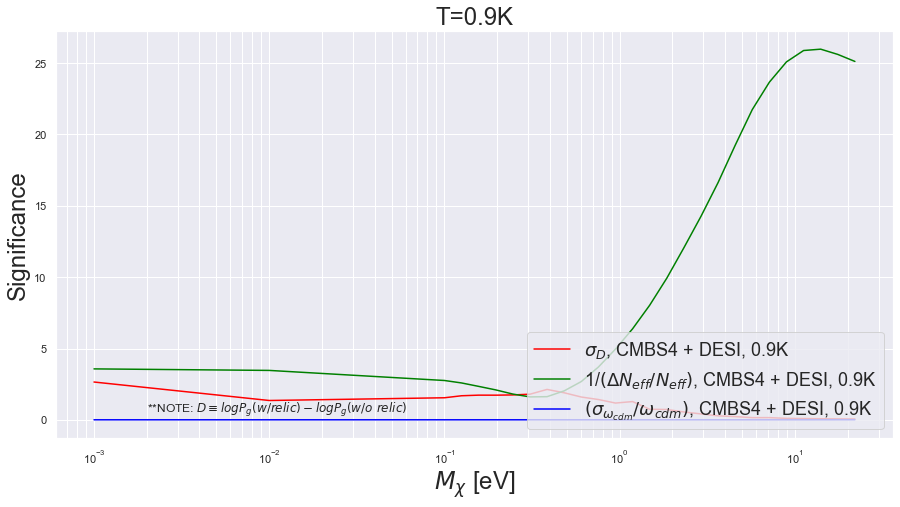

In [21]:
masses_ev = np.append(np.array([0.001, 0.01]), np.geomspace(0.1, 22.0, 25))

basepath = '/Users/nicholasdeporzio/Desktop/cfworkspace/results/'
mattype = '/inv_fullfisher.mat'
high_desi_cmbs4_905mK_covs = [pd.read_csv(basepath+'ps5/High_Masses/Fixed_Kmax/CMBS4/M'+str(idx+1)+mattype, sep='\t', header=0) for idx in range(len(masses_ev))]
high_desi_cmbs4_905mK_Terrs = [np.sqrt(high_desi_cmbs4_905mK_covs[idx].iloc[6,6]) for idx in range(len(masses_ev))]
relerrNeff = 4. * np.array(high_desi_cmbs4_905mK_Terrs) / 0.9

high_desi_cmbs4_905mK_omegacdmerrs = [np.sqrt(high_desi_cmbs4_905mK_covs[idx].iloc[1,1]) for idx in range(len(masses_ev))]
omegacdm_set = 0.1127 - ((masses_ev/cf.NEUTRINO_SCALE_FACTOR) * np.power(0.9 / 1.95, 3.))   

data2 = relerrNeff
data3 =  np.array(high_desi_cmbs4_905mK_omegacdmerrs) / omegacdm_set

plt.figure(figsize=(15,7.5))

plt.semilogx(masses_ev, data1, label=r"$\sigma_D$, CMBS4 + DESI, 0.9K", linestyle='solid', color='red')
plt.semilogx(masses_ev, 1./data2, label=r"1/$(\Delta N_{eff}/N_{eff})$, CMBS4 + DESI, 0.9K", linestyle='solid', color='green')
plt.semilogx(masses_ev, data3, label=r"$(\sigma_{\omega_{cdm}}/\omega_{cdm})$, CMBS4 + DESI, 0.9K", linestyle='solid', color='blue')

plt.title("T=0.9K", fontsize=24)
plt.xlabel(r"$M_\chi$ [eV]", fontsize=24)
plt.ylabel(r"Significance", fontsize=24)
plt.legend(fontsize=18, loc='lower right')
plt.tick_params(axis='x', which='minttor')
plt.grid(True, which='minor')
plt.text(0.2e-2,  0.5, r"**NOTE: $D \equiv log P_g (w/ relic) - log P_g (w/o ~relic)$")
plt.savefig("/Users/nicholasdeporzio/Desktop/testing/plotA4.png")
plt.show()

# Plot Contours for a Few Relic Masses

In [1]:
# Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, loadMCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
import numpy as np
import pandas as pd
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

GetDist Version: 1.1.0, Matplotlib version: 3.1.2


In [2]:
# Add Fisher Contours
cov1a = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M1/inv_cmbfisher.mat", skiprows=1)
fish1b = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M1_LSS_Fisher.dat", skiprows=1)
cov1c = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M1/inv_fullfisher.mat", skiprows=1)

cov2a = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M6/inv_cmbfisher.mat", skiprows=1)
fish2b = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M6_LSS_Fisher.dat", skiprows=1)
cov2c = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M6/inv_fullfisher.mat", skiprows=1)

cov3a = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M10/inv_cmbfisher.mat", skiprows=1)
fish3b = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M10_LSS_Fisher.dat", skiprows=1)
cov3c = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M10/inv_fullfisher.mat", skiprows=1)

cov4a = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M15/inv_cmbfisher.mat", skiprows=1)
fish4b = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M15_LSS_Fisher.dat", skiprows=1)
cov4c = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M15/inv_fullfisher.mat", skiprows=1)

cov5a = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M27/inv_cmbfisher.mat", skiprows=1)
fish5b = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M27_LSS_Fisher.dat", skiprows=1)
cov5c = np.loadtxt("/Users/nicholasdeporzio/Desktop/cfworkspace/results/ps15/Planck/M27/inv_fullfisher.mat", skiprows=1)

fish1b = np.delete(fish1b, 5, 0)
fish1b = np.delete(fish1b, 5, 1)
cov1b = np.linalg.inv(fish1b)

fish2b = np.delete(fish2b, 5, 0)
fish2b = np.delete(fish2b, 5, 1)
cov2b = np.linalg.inv(fish2b)

fish3b = np.delete(fish3b, 5, 0)
fish3b = np.delete(fish3b, 5, 1)
cov3b = np.linalg.inv(fish3b)

fish4b = np.delete(fish4b, 5, 0)
fish4b = np.delete(fish4b, 5, 1)
cov4b = np.linalg.inv(fish4b)

fish5b = np.delete(fish5b, 5, 0)
fish5b = np.delete(fish5b, 5, 1)
cov5b = np.linalg.inv(fish5b)

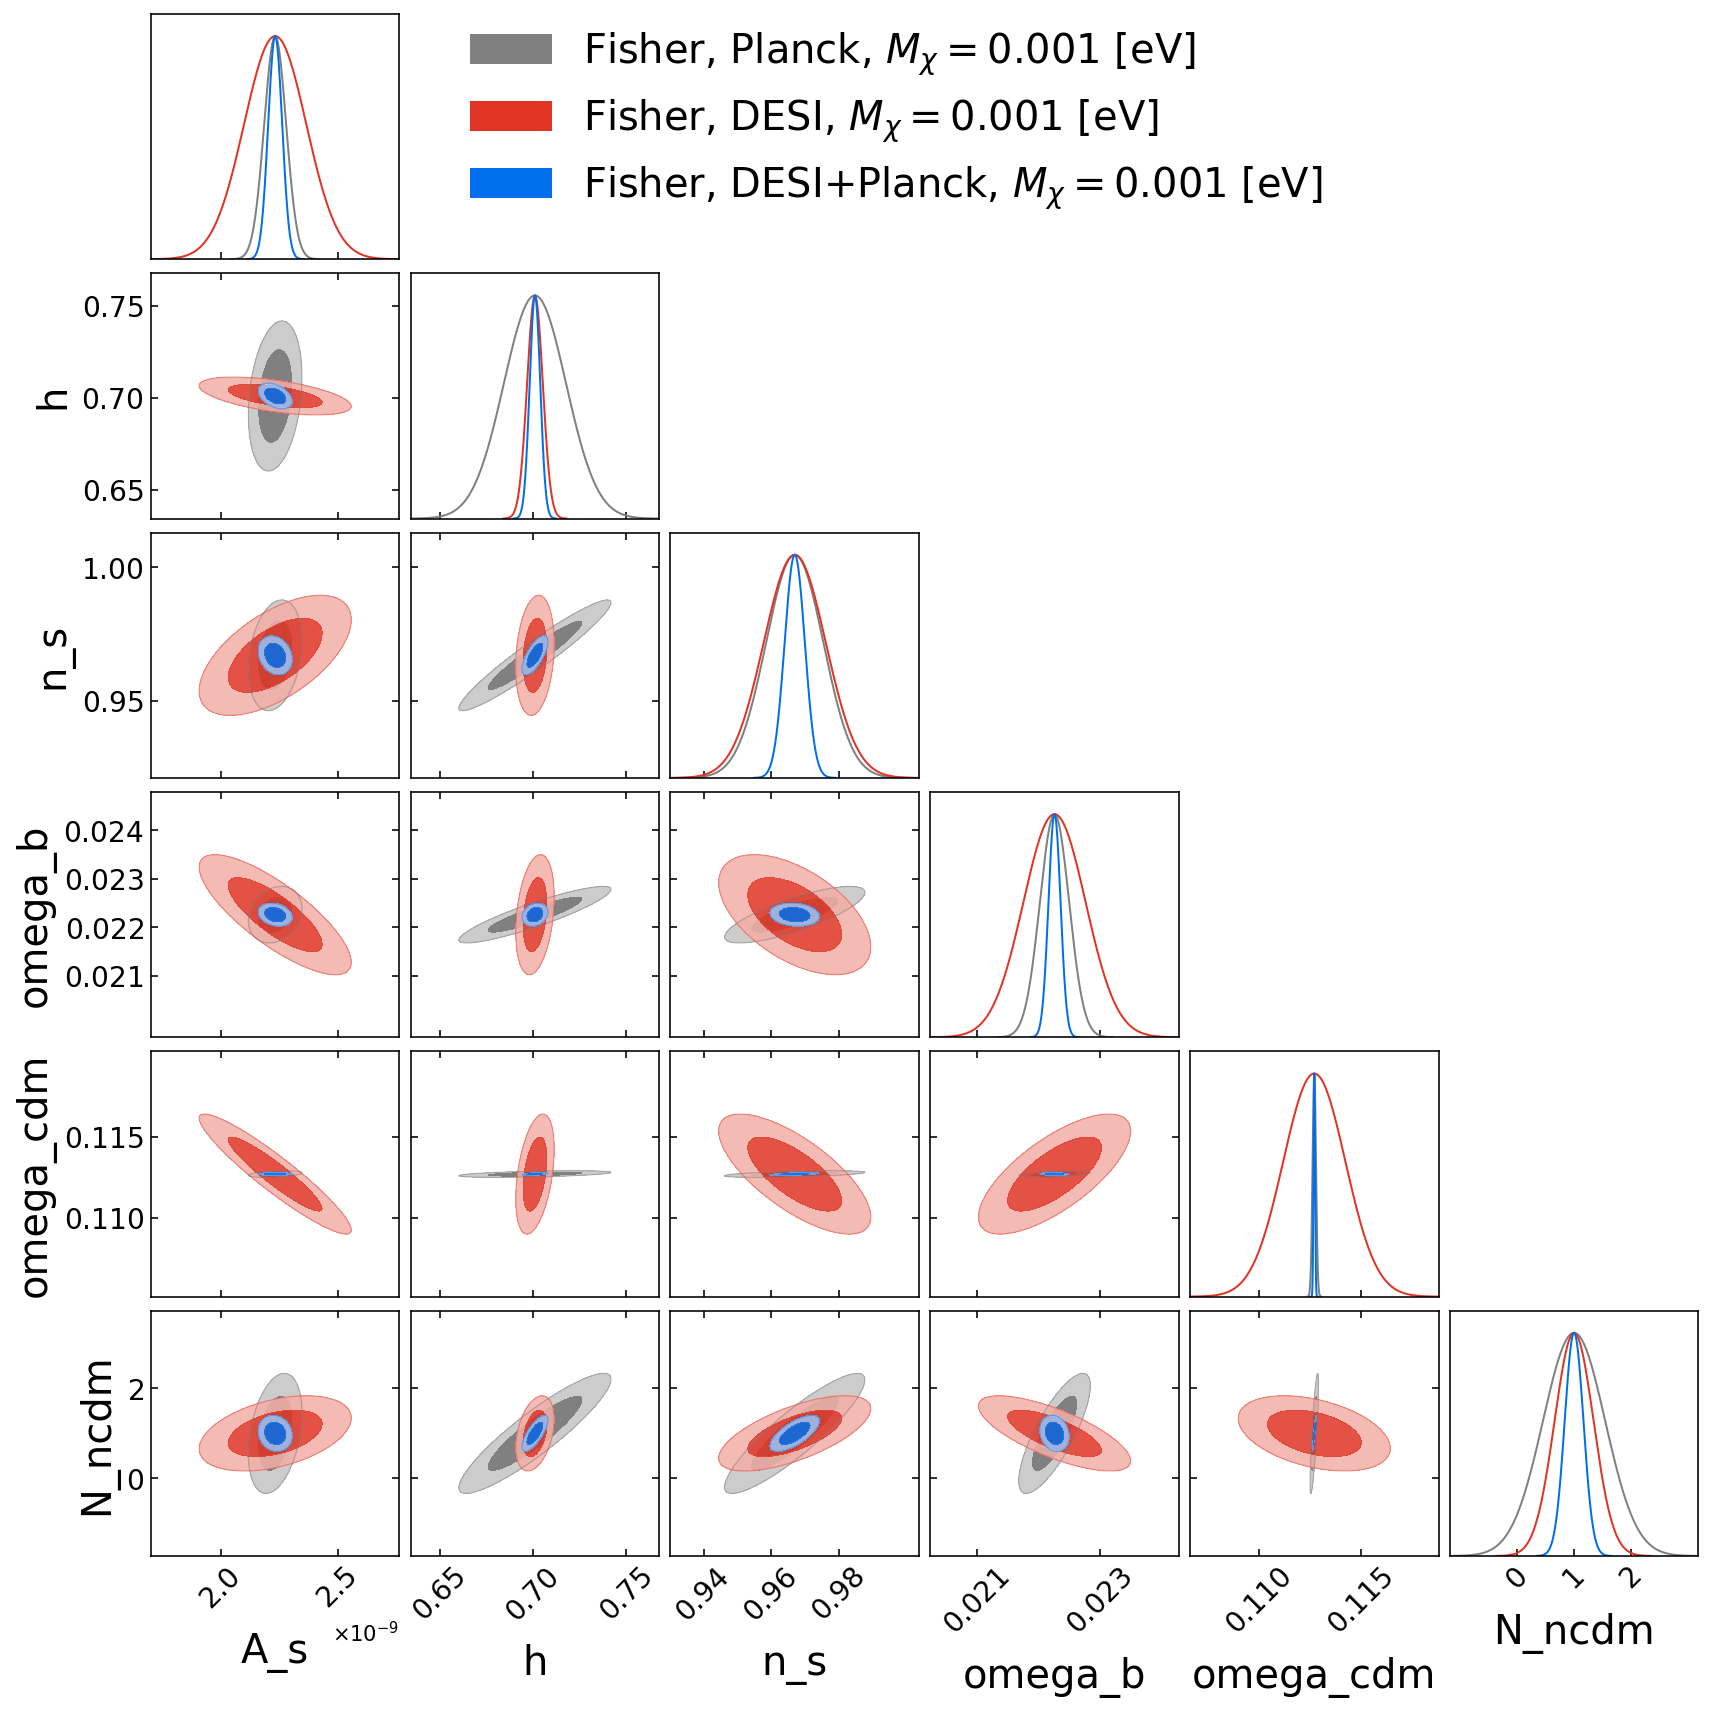

In [3]:
fullparamnames = [r'A_s', r'h', r'n_s', r'omega_b', r'omega_cdm', r'tau_reio', r'N_ncdm', r'sigma_fog', r'beta0', r'beta1', r'alpha_k2']
lssparamnames = [r'A_s', r'h', r'n_s', r'omega_b', r'omega_cdm', r'N_ncdm', r'sigma_fog', r'beta0', r'beta1', r'alpha_k2']
cmbparamnames = [r'A_s', r'h', r'n_s', r'omega_b', r'omega_cdm', r'tau_reio', r'N_ncdm']

fullfid = [2.2321e-9, 0.701, 0.967, 0.02226, 0.1127, 0.0598, 1., 250000., 1.7, 1.0, 1.0]
lssfid = [2.2321e-9, 0.701, 0.967, 0.02226, 0.1127, 1., 250000., 1.7, 1.0, 1.0]
cmbfid = [2.2321e-9, 0.701, 0.967, 0.02226, 0.1127, 0.0598, 1.]

fiducial = [2.2321e-9, 0.701, 0.967, 0.02226, 0.1127, 0.0598, 1., 250000., 1.7, 1.0, 1.0]
ellipses_a = GaussianND(cmbfid, cov1a, names=cmbparamnames)
ellipses_b = GaussianND(lssfid, cov1b, names=lssparamnames)
ellipses_c = GaussianND(fullfid, cov1c, names=fullparamnames)

h = plots.get_subplot_plotter()

# Set a default plot style 
from getdist.styles.tab10 import style_name
plots.set_active_style(style_name)

# Adjust plot sizes, styles, etc using getdist.plots.GetDistPlotSettings class
h.settings.figure_legend_frame = False #Box around legend
h.settings.scaling=False #Defaults to font size for Tick Labels: 11, Labels: 14, Legend: 12, Text: 12
h.settings.axes_fontsize=14
h.settings.axes_labelsize=20
h.settings.axis_tick_x_rotation=45
h.settings.legend_fontsize=20
#h.settings.axis_tick_y_rotation=90
#h.settings.colorbar_tick_rotation=90

h.triangle_plot(
    [ellipses_a, ellipses_b, ellipses_c], 
    filled=True,
    params=[r'A_s', r'h', r'n_s', r'omega_b', r'omega_cdm', r'N_ncdm'],
    legend_labels=[r'Fisher, Planck, $M_\chi=0.001$ [eV]', r'Fisher, DESI, $M_\chi=0.001$ [eV]', r'Fisher, DESI+Planck, $M_\chi=0.001$ [eV]'])
plt.savefig("/Users/nicholasdeporzio/Desktop/only_fisher.png")